In [35]:
# Ignorar alertas
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from skopt import BayesSearchCV
from skopt.space import Integer, Real
#Métricas de performance
from sklearn import metrics
from sklearn.metrics import (f1_score,accuracy_score,recall_score,precision_score,confusion_matrix,roc_auc_score,mean_squared_error,r2_score)


In [ ]:
def performance_modelo_classificacao(y_train,y_test,pred_train,pred_val):
     
    '''
    Função para computar as diferentes métricas de performance para modelos de classificação.
 
    model: modelo para prever os valores de X
    flag: se imprimimos ou não os resultados
    '''
     
    # Lista para armazenar os resultados de Treino e Validação
    score_list = []
     
    # Acurácia do modelo
    train_acc = accuracy_score(y_train, pred_train)
    val_acc = accuracy_score(y_test, pred_val)
     
    # Recall do modelo 
    train_recall = recall_score(y_train, pred_train,average = 'micro')
    val_recall = recall_score(y_test, pred_val,average = 'micro')
     
    # Precisão do modelo
    train_prec = precision_score(y_train, pred_train,average = 'micro')
    val_prec = precision_score(y_test, pred_val,average = 'micro')
     
    # F1-Score do modelo
    train_f1 = f1_score(y_train, pred_train, average = 'micro')
    val_f1 = f1_score(y_test, pred_val, average = 'micro')
     
    # Popula a lista
    score_list.extend((train_acc, val_acc, train_recall, val_recall, train_prec, val_prec, train_f1, val_f1))
     
    # Imprime a lista se flag=True (default)
    print(f'Acurácia na base de Treino: {train_acc}')
    print(f'Acurácia na base de Teste: {val_acc}')
    print(f'\nRecall na base de Treino: {train_recall}')
    print(f'Recall na base de Teste: {val_recall}')
    print(f'\nPrecisão na base de Treino: {train_prec}')
    print(f'Precisão na base de Teste: {val_prec}')
    print(f'\nF1-Score na base de Treino: {train_f1}')
    print(f'F1-Score na base de Teste: {val_f1}')
         
    # Retorna a lista de valores em Treino e Validação
    return score_list

## Leitura dos Dados

In [3]:
df_medicoes = pd.read_csv('./data/BD_Linhas-de-Transmissão(Documentos de Medição).csv', encoding='latin-1', sep=';')
df_cadastro = pd.read_csv('./data/BD_Linhas-de-Transmissão(Cadastro).csv', encoding='latin-1', sep=';')

df_qualificacao = df_medicoes[df_medicoes['Item medição'] == 'TORRE']
df_medicoes = df_medicoes[df_medicoes['Item medição'] != 'TORRE']

In [4]:
df_qualificacao.head()

,Equipamento,Ponto medição,Doc.medição,Data,Item medição,Valor teórico,LimInfIntMed.,LimSupIntMed.,ValMed/PosTCont,Unid.caracter.,Cód.valorização,Txt.code codif.,Denominação,Texto
23,294939,9283757,7983160,18/02/2025,TORRE,NaN,"0,00",NaN,"5,00",UN,NaN,NaN,Qualificacao do Equipamento,D:0*1/ 0*2/ 0*3/ 0*4/ 2*5/ 165*9
24,294939,9283757,3692788,02/02/2022,TORRE,NaN,"0,00",NaN,"9,00",UN,NaN,NaN,Qualificacao do Equipamento,D:0*1/ 0*2/ 0*3/ 0*4/ 0*5/ 167*9
26,294938,9283589,7983161,18/02/2025,TORRE,NaN,"0,00",NaN,"4,00",UN,NaN,NaN,Qualificacao do Equipamento,ENTULHO. D:0*1/ 0*2/ 0*3/ 1*4/ 2*5/ 164*
27,294938,9283589,4758120,05/05/2023,TORRE,NaN,"0,00",NaN,"5,00",UN,NaN,NaN,Qualificacao do Equipamento,D:0*1/ 0*2/ 0*3/ 0*4/ 2*5/ 165*9
28,294938,9283589,3692787,02/02/2022,TORRE,NaN,"0,00",NaN,"9,00",UN,NaN,NaN,Qualificacao do Equipamento,D:0*1/ 0*2/ 0*3/ 0*4/ 0*5/ 167*9


In [5]:
df_medicoes.head()

,Equipamento,Ponto medição,Doc.medição,Data,Item medição,Valor teórico,LimInfIntMed.,LimSupIntMed.,ValMed/PosTCont,Unid.caracter.,Cód.valorização,Txt.code codif.,Denominação,Texto
0,323958,10155659,7991396,18/02/2025,VÃO,"0,00","0,00","100,00","1.500,00",m2,3.0,FIM DO VAO,ROCADA MECANIZADA,Roçada mecanizada no final do vão 50x30.
1,323957,10155490,7991397,18/02/2025,VÃO,"0,00","0,00","100,00","5.400,00",m2,1.0,INICIO DO VAO,ROCADA MANUAL,Roçada manual no início do vão 180x30. R
2,323957,10155491,7991398,18/02/2025,VÃO,"0,00","0,00","100,00","3.600,00",m2,5.0,MEIO E FIM DO VAO,ROCADA MECANIZADA,Roçada mecanizada no meio e fim do vão 1
3,323955,10155322,7991399,18/02/2025,VÃO,"0,00","0,00","100,00","6.000,00",m2,5.0,MEIO E FIM DO VAO,ROCADA MANUAL,Roçada manual no meio e fim do vão 200x3
4,323954,10155155,7991400,18/02/2025,VÃO,"0,00","0,00","100,00","10.350,00",m2,7.0,VAO COMPLETO,ROCADA MECANIZADA,Roçada mecanizada vão total 345x30. Rel


In [6]:
df_cadastro.head()

,Equipamento,Linha de Transmissão,Denominação,Dt.entr.serviço,Classe,Código ABC,Tensão,Latitude,Longitude
0,115280,LT31,Torre 111,NaN,L_TORRE_AUTOPORT,C,230,"-22,9776099","-50,0565232"
1,115281,LT31,Torre 112,NaN,L_TORRE_AUTOPORT,C,230,"-22,9791718","-50,0531681"
2,115282,LT31,Torre 113,NaN,L_TORRE_AUTOPORT,C,230,"-22,9808738","-50,0494992"
3,115283,LT31,Torre 114,NaN,L_TORRE_AUTOPORT,C,230,"-22,9830172","-50,0449193"
4,115284,LT31,Torre 115,NaN,L_TORRE_AUTOPORT,C,230,"-22,9846747","-50,0413489"


## Analise de Dados Faltantes

#### Cadastro

In [7]:
del df_cadastro['Dt.entr.serviço']

df_cadastro['Latitude'] = df_cadastro['Latitude'].replace('#N/D', pd.NA)
df_cadastro['Longitude'] = df_cadastro['Longitude'].replace('#N/D', pd.NA)

df_cadastro['Latitude'] = df_cadastro['Latitude'].apply(lambda x: float(str(x).replace(',', '.')) if pd.notna(x) else x)
df_cadastro['Longitude'] = df_cadastro['Longitude'].apply(lambda x: float(str(x).replace(',', '.')) if pd.notna(x) else x)

In [8]:
lista_info = []
for elem in list(df_cadastro.columns):
    lista = df_cadastro[elem].sort_values(ascending = True).unique().tolist()
    lista_info.append((len(lista),df_cadastro[elem].sort_values(ascending = True).isnull().sum(),round(df_cadastro[elem].sort_values(ascending = True).isnull().sum()/df_cadastro.shape[0]*100,2)))

In [9]:
df_infos_features = pd.DataFrame(data = lista_info, columns = ["Total","Null","Percentual"], index = list(df_cadastro.columns))

In [10]:
display(df_infos_features)

,Total,Null,Percentual
Equipamento,36229,0,0.00
Linha de Transmissão,272,0,0.00
Denominação,1885,0,0.00
Classe,9,227,0.63
Código ABC,2,0,0.00
Tensão,8,0,0.00
Latitude,31284,4839,13.36
Longitude,31289,4839,13.36


##### Tratando dados ausentes do campo classe - Árvore de decisão de classificação

In [11]:
feature_cols = ['Linha de Transmissão','Denominação','Código ABC','Tensão'] 
X = df_cadastro[feature_cols] # Features

le = LabelEncoder()
y = df_cadastro['Classe'][df_cadastro['Classe'].notnull()]
y_encoded = le.fit_transform(y)

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X)

In [12]:
indices_not_null = y.index.tolist()
X_encoded_not_null = X_encoded[indices_not_null]

In [13]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded_not_null, y_encoded, test_size=0.3, random_state=42) # 70% training and 30% test

In [14]:
# Criando modelo de árvore de decisão de classificação
clf = DecisionTreeClassifier(random_state=42)

In [15]:
# Definir o espaço de busca para os hiperparâmetros
search_spaces = {
    'max_depth': Integer(1, 66),
    'min_samples_split': Integer(2, 6),
    'min_samples_leaf': Integer(1, 6),
    'max_features': Real(0.1, 1.0, prior='uniform')
}

In [16]:
# Configurar a busca bayesiana
opt = BayesSearchCV(
    estimator=clf,
    search_spaces=search_spaces,
    n_iter=32,  # número de iterações de busca
    scoring='neg_mean_squared_error',
    cv=3,
    random_state=42
)

In [ ]:
# Executar a busca
opt.fit(X_train, y_train)

# Melhor hiperparâmetro encontrado
print("Melhores hiperparâmetros:", opt.best_params_)

Melhores hiperparâmetros: OrderedDict({'max_depth': 49, 'max_features': 0.9454327638424945, 'min_samples_leaf': 2, 'min_samples_split': 3})


In [ ]:

# Avaliar no conjunto de Treino
y_pred_train = opt.predict(X_train)

# Avaliar no conjunto de teste
y_pred_test = opt.predict(X_test)

# Métricas de performance da classificação
met_clas = performance_modelo_classificacao(y_train,y_test,y_pred_train,y_pred_test)


Acurácia na base de Treino: 0.9644061743581603
Acurácia na base de Teste: 0.9612072956207759

Recall na base de Treino: 0.9644061743581603
Recall na base de Teste: 0.9612072956207759

Precisão na base de Treino: 0.9644061743581603
Precisão na base de Teste: 0.9612072956207759

F1-Score na base de Treino: 0.9644061743581603
F1-Score na base de Teste: 0.9612072956207759


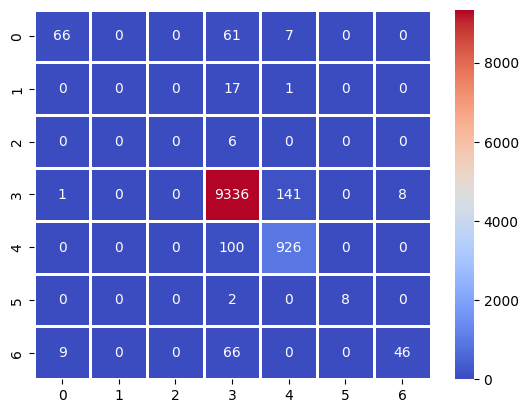

In [36]:
# Matriz de confusão
cf_matrix = confusion_matrix(y_test, y_pred_test)

# Criando o heatmap
sns.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

#### Mediçoes

In [7]:
df_medicoes.isnull().sum()

Equipamento           0
Ponto medição         0
Doc.medição           0
Data                  0
Item medição          0
Valor teórico         0
LimInfIntMed.         0
LimSupIntMed.         0
ValMed/PosTCont     958
Unid.caracter.        0
Cód.valorização    3574
Txt.code codif.    3574
Denominação           0
Texto              7063
dtype: int64

In [8]:
colunas_para_converter = ['Valor teórico', 'LimInfIntMed.', 'LimSupIntMed.', 'ValMed/PosTCont']

for coluna in colunas_para_converter:
    df_medicoes[coluna] = df_medicoes[coluna].apply(
        lambda x: float(str(x).replace('.', '').replace(',', '.')) if pd.notna(x) else np.nan
    )



In [9]:
# Se tiver faltando a medição e a qualificação for 5, então a medição é a média da faixa de medição.

aux_ = df_medicoes[df_medicoes['ValMed/PosTCont'].isna()]
aux_ = aux_[aux_['Texto'] == '5']
df_medicoes.loc[aux_.index, 'ValMed/PosTCont'] = (aux_['LimSupIntMed.'] - aux_['LimInfIntMed.'])/2


In [10]:
# Se tiver faltando a medição e a condição for normal, então a medição é a média da faixa de medição.


aux_ = df_medicoes[df_medicoes['ValMed/PosTCont'].isna()]
aux_ = aux_[aux_['Txt.code codif.'] == 'CONDIÇÃO NORMAL']
df_medicoes.loc[aux_.index, 'ValMed/PosTCont'] = (aux_['LimSupIntMed.'] - aux_['LimInfIntMed.'])/2


In [11]:
df_medicoes = df_medicoes[df_medicoes['ValMed/PosTCont'].notna()]

In [12]:
# Essas variaveis são complexas de serem preenchidas, então vamos preencher com valores desconhecidos.

df_medicoes['Txt.code codif.'] = df_medicoes['Txt.code codif.'].fillna('Desconhecido')
df_medicoes['Cód.valorização'] = df_medicoes['Cód.valorização'].fillna(-1)
df_medicoes['Texto'] = df_medicoes['Texto'].fillna('Não Informado')


In [13]:
df_medicoes.isnull().sum()

Equipamento        0
Ponto medição      0
Doc.medição        0
Data               0
Item medição       0
Valor teórico      0
LimInfIntMed.      0
LimSupIntMed.      0
ValMed/PosTCont    0
Unid.caracter.     0
Cód.valorização    0
Txt.code codif.    0
Denominação        0
Texto              0
dtype: int64

#### Qualificação

In [14]:
del df_qualificacao['Valor teórico']
del df_qualificacao['LimInfIntMed.']
del df_qualificacao['LimSupIntMed.']
del df_qualificacao['Cód.valorização']
del df_qualificacao['Txt.code codif.']

## Enriquecimento

In [15]:
df_medicoes['Data'] = pd.to_datetime(df_medicoes['Data'], format='%d/%m/%Y', errors='coerce')
df_medicoes['Ano'] = df_medicoes['Data'].dt.year
df_medicoes['Mes'] = df_medicoes['Data'].dt.month

df_qualificacao['Data'] = pd.to_datetime(df_qualificacao['Data'], format='%d/%m/%Y', errors='coerce')
df_qualificacao['Ano'] = df_qualificacao['Data'].dt.year
df_qualificacao['Mes'] = df_qualificacao['Data'].dt.month


In [16]:
df_medicoes['inside_limits'] = (df_medicoes['ValMed/PosTCont'] >= df_medicoes['LimInfIntMed.']) & (df_medicoes['ValMed/PosTCont'] <= df_medicoes['LimSupIntMed.'])

In [17]:
# Calcula o índice de desvio em relação ao intervalo esperado
df_medicoes['desvio'] = 0  # Valor padrão para caso dentro dos limites

# Caso valor > limite_sup
mask_acima = df_medicoes['ValMed/PosTCont'] > df_medicoes['LimSupIntMed.']
df_medicoes.loc[mask_acima, 'desvio'] = (df_medicoes.loc[mask_acima, 'ValMed/PosTCont'] - 
                                         df_medicoes.loc[mask_acima, 'LimSupIntMed.']) / df_medicoes.loc[mask_acima, 'LimSupIntMed.']

# Caso valor < limite_inf
mask_abaixo = df_medicoes['ValMed/PosTCont'] < df_medicoes['LimInfIntMed.']
df_medicoes.loc[mask_abaixo, 'desvio'] = (df_medicoes.loc[mask_abaixo, 'ValMed/PosTCont'] - 
                                          df_medicoes.loc[mask_abaixo, 'LimInfIntMed.']) / (df_medicoes.loc[mask_abaixo, 'LimSupIntMed.'] - 
                                                                                           df_medicoes.loc[mask_abaixo, 'LimInfIntMed.'])

In [18]:
df_medicoes.to_csv("./processed_data/medicoes.csv", index=False)
df_qualificacao.to_csv("./processed_data/qualificacao.csv", index=False)
df_cadastro.to_csv("./processed_data/cadastro.csv", index=False)